In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("uber.csv")
data



,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
 #Data Preprocessing
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
data = data.dropna()

In [9]:
data.isnull().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
# Filter the data to keep only fare_amount greater than 0
data = data[data['fare_amount'] > 0]
data["pickup_datetime"] = data["pickup_datetime"].astype(str)
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x: x.split(' ')[0])
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"], errors='coerce')
data["pickup_year"] = data["pickup_datetime"].dt.year

In [11]:
data.drop(columns=['key','pickup_datetime'],inplace=True)

In [12]:
data.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014


In [47]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.000367,0.002618,-0.002413,0.000589,0.012618
pickup_longitude,0.000367,1.000000,-0.812047,0.835950,-0.850574,-0.000751
pickup_latitude,0.002618,-0.812047,1.000000,-0.767103,0.684558,-0.001604
dropoff_longitude,-0.002413,0.835950,-0.767103,1.000000,-0.913949,0.000203
dropoff_latitude,0.000589,-0.850574,0.684558,-0.913949,1.000000,-0.000853
passenger_count,0.012618,-0.000751,-0.001604,0.000203,-0.000853,1.000000


<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


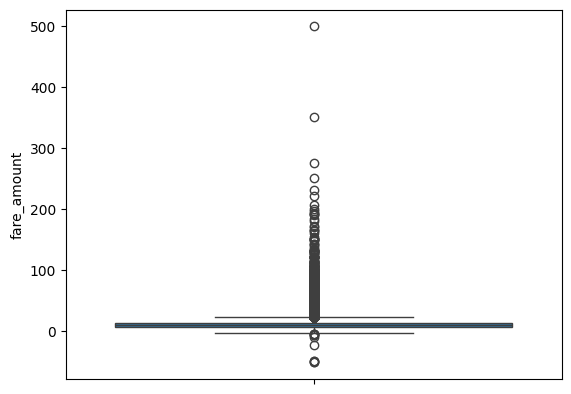

In [5]:
 #Outlier
sns.boxplot(data['fare_amount'])
data.info()


In [6]:
if data.shape[0] > 0:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data['fare_amount'].quantile(0.25)
    Q3 = data['fare_amount'].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    data_cleaned = data[(data['fare_amount'] >= lower_bound) & (data['fare_amount'] <= upper_bound)]
else:
    data_cleaned = data  # No data to clean

# Display the cleaned DataFrame
print(data_cleaned.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

<Axes: xlabel='fare_amount'>

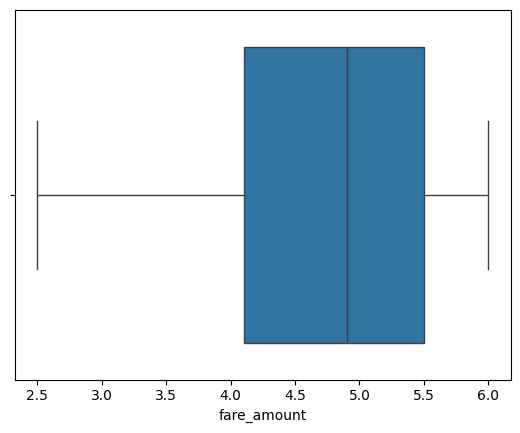

In [7]:
data.drop(data[(data['fare_amount'] <= 1) | (data['fare_amount'] > 6)].index, inplace=True)
sns.boxplot(x=data['fare_amount'])

In [31]:
data= data_cleaned
data = data.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1)

In [34]:
X = data.drop(['fare_amount'], axis=1)  # Features
y = data['fare_amount']                  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Optional: Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (137124, 5)
X_test shape: (45709, 5)
y_train shape: (137124,)
y_test shape: (45709,)


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182833 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        182833 non-null  float64
 1   pickup_longitude   182833 non-null  float64
 2   pickup_latitude    182833 non-null  float64
 3   dropoff_longitude  182833 non-null  float64
 4   dropoff_latitude   182833 non-null  float64
 5   passenger_count    182833 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 MB


In [35]:
 #Linear Regression model

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
print(y_pred_lr)

[8.91388051 8.91400563 8.95131762 ... 8.91376874 8.91396092 8.91395904]


In [36]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")
# Example call
evaluate_model(y_test, y_pred_lr, "Linear Regression")

Linear Regression RMSE: 4.13
Linear Regression R-squared (R2): 0.00


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Print predictions
print("Predictions:", y_pred_rf)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

In [46]:
new_trip_data = {
   'pickup_longitude': [-73.9850],
    'pickup_latitude': [40.7488],
    'dropoff_longitude': [-73.9845],
    'dropoff_latitude': [40.7500],
    'passenger_count': [1]
}

# Create a DataFrame for the new trip
new_trip_df = pd.DataFrame(new_trip_data)

# Make a prediction for the new trip
predicted_fare_rf = rf_model.predict(new_trip_df)

# Print the predicted fare
print("Predicted Fare for the new trip:", predicted_fare_rf[0])

Predicted Fare for the new trip: 6.11
